In [7]:
#Load packages

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from scipy.special import erf

In [8]:
#Import data from same folder

data=pd.read_csv('us-counties.csv')
datastate=pd.read_csv('us-states.csv')

In [12]:
#Fit to cumulative cases (not shown)

def fiterf(x, a, b,c):
    return a(1+erf(b*(x-c)))

In [13]:
#Fit to daily cases

def fitexp(x, a, b,c,d):
    return a*np.exp(-b*(x-c)**2)

In [120]:
#Define function to plot county data

def plotcountyrate(county,state):
    
    #Initialize arrays
    
    date=np.empty(0)
    cases=np.empty(0)
    rate=np.empty(0)
    
    #Calculate daily rate
    
    for i in range(len(data)):
        if data['state'][i]==state and data['county'][i]==county:
            date=np.append(date,data['date'][i])
            cases=np.append(cases,data['cases'][i])

    for i in range(len(cases)):
        if i==0:
            rate=np.append(rate,0)
        else:
            rate=np.append(rate,cases[i]-cases[i-1])

    #define plots
    
    fig, ax= plt.subplots()
    #ax.plot(date,cases,'-x')
    ax.plot(date,rate,'-x')

    #fit to gaussian curve
    daten=np.array(range(len(date)))
    popt, pcov = curve_fit(fitexp, daten, rate,bounds=([0,-1,0,-1e6],[1e3,2.5,np.int(len(date)*1.3),1e6]))
    xnew=np.linspace(0,np.int(len(date)*1.2),100)
    print(popt)
    ax.plot(xnew,fitexp(xnew,*popt))

    perr = np.sqrt(np.diag(pcov))
    print(perr)
    
    # create bounds
    
    bound_upper = fitexp(xnew, *(popt+(perr[0],0,0,0)))
    bound_lower = fitexp(xnew, *(popt-(min(perr[0],popt[0]),0,0,0)))
    
    # plotting the confidence intervals
    plt.fill_between(xnew, bound_lower, bound_upper,
                     color = 'black', alpha = 0.15)

    # bound_upper = fitexp(xnew, *(popt+(0,0,perr[2],0)))
    # bound_lower = fitexp(xnew, *(popt-(0,0,perr[2],0)))
    # # plotting the confidence intervals
    # plt.fill_between(xnew, bound_lower, bound_upper,
    #                  color = 'black', alpha = 0.15)
    ax.set_ylim(0,np.max(rate)*1.2)

    ax.set_xlabel('date')
    ax.set_ylabel('daily cases')

    ax.set_xticks(date[::10])

    ax.set_title(county+', '+state+' daily cases')
    return plt.show()

In [104]:
#Same as above with state-level data

def plotstaterate(name):
    date=np.empty(0)
    cases=np.empty(0)
    rate=np.empty(0)
    for i in range(len(datastate)):
        if datastate['state'][i]==name:
            date=np.append(date,datastate['date'][i])
            cases=np.append(cases,datastate['cases'][i])

    for i in range(len(cases)):
        if i==0:
            rate=np.append(rate,0)
        else:
            rate=np.append(rate,cases[i]-cases[i-1])


    fig, ax= plt.subplots()
    #ax.plot(date,cases,'-x')
    ax.plot(date,rate,'-x')

    #fit
    daten=np.array(range(len(date)))
    popt, pcov = curve_fit(fitexp, daten, rate, bounds=([0,0,0,-1e6],[1e4,0.2,np.int(len(date)*1.3),1e6]))
    xnew=np.linspace(0,np.int(len(date)*1.2),100)
    print(popt)
    ax.plot(xnew,fitexp(xnew,*popt))
    ax.axvline(popt[2],color='C1',linestyle='dashed')

    perr = np.sqrt(np.diag(pcov))
    print(perr)
    bound_upper = fitexp(xnew, *(popt+(perr[0],0,0,0)))
    bound_lower = fitexp(xnew, *(popt-(perr[0],0,0,0)))
    # plotting the confidence intervals
    plt.fill_between(xnew, bound_lower, bound_upper,
                     color = 'black', alpha = 0.15)

    ax.set_ylim(0,np.max(rate)*1.2)

    ax.set_xlabel('date')
    ax.set_ylabel('daily cases')

    ax.set_xticks(date[::np.int(len(date)/3)])

    ax.set_title(name+' daily cases')
    return plt.show()

[9.50534746e+03 5.99278561e-03 3.36715307e+01 0.00000000e+00]
[3.14565569e+02 9.48867917e-04 8.29207904e-01 0.00000000e+00]


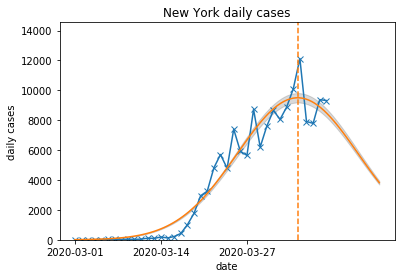

In [121]:
plotstaterate('New York')

[7.88624217e+02 6.13225825e-03 2.65095075e+01 0.00000000e+00]
[7.04057616e+01 1.86267803e-03 1.26293356e+00 0.00000000e+00]


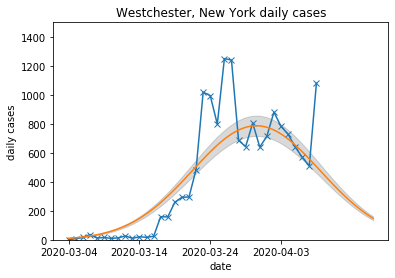

In [124]:
plotcountyrate('Westchester','New York')